# Sub-Gaussian tail probability

$$
    \text{Pr}\left(
        \bar X_N \geq \mu + \sqrt{\frac{2b\log(1 / \delta)}{N}}
    \right) \leq \delta
$$


* Example: A Gaussian rv $X\sim{\cal N}(\mu, \sigma^2)$ is subgaussian with $b=\sigma^2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = "retina"

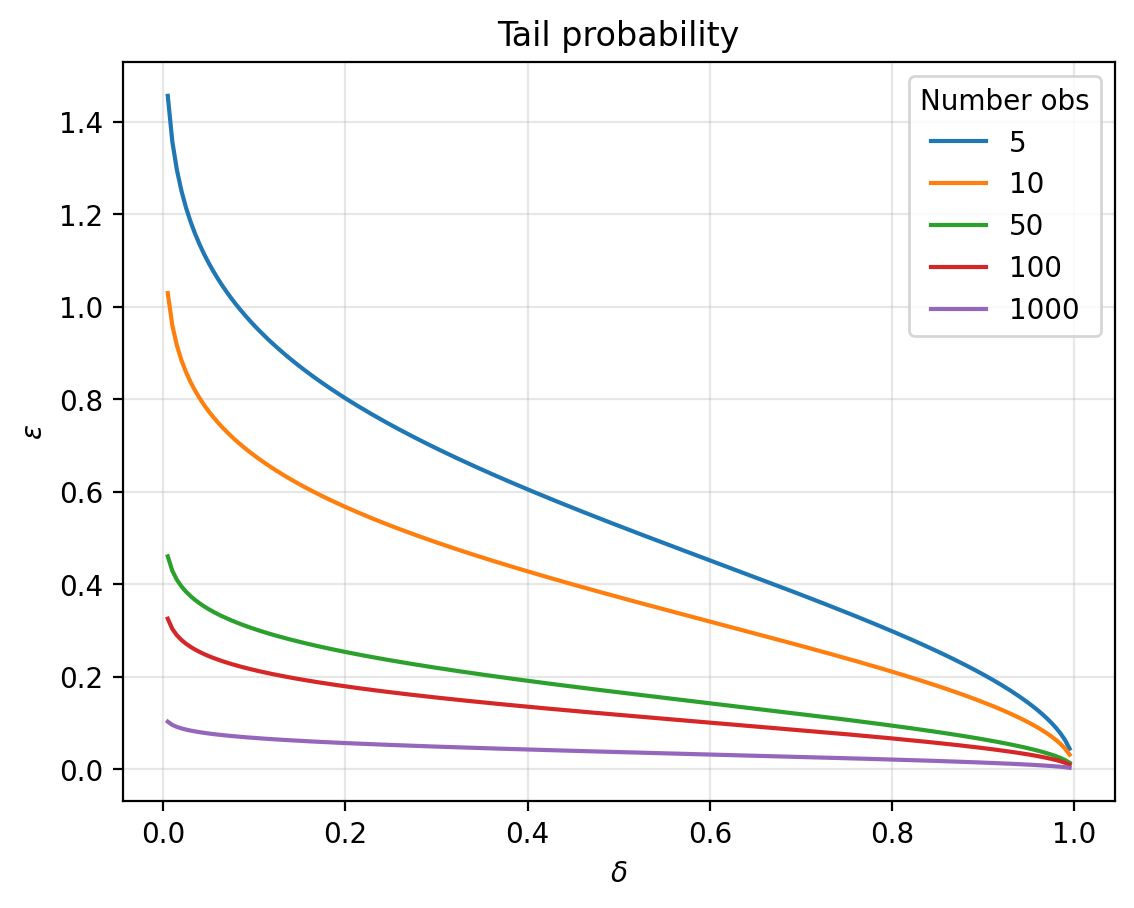

In [3]:
delta = np.linspace(0, 1, 202)[1:-1]

list_n_obs = [5, 10, 50, 100, 1000]
for n_obs in list_n_obs:
    eps = np.sqrt((2 * np.log(1 / delta)) / n_obs)
    plt.plot(delta, eps, label=n_obs)
    # plt.plot(eps, delta, label=n_obs)
plt.ylabel("$\epsilon$")
plt.xlabel("$\delta$")
plt.legend(title="Number obs")
plt.title("Tail probability")
plt.grid(alpha=0.3)

## Hoeffding's inequality

Let 

$$
    h(\lambda) = \log\left[ (1 - \mu) \exp(0) + \mu \exp(\lambda) \right]
$$

In [4]:
def hprime(mu, lmbda):
    num = mu * np.exp(lmbda)
    den = (1 - mu) + mu * np.exp(lmbda)
    return num / den

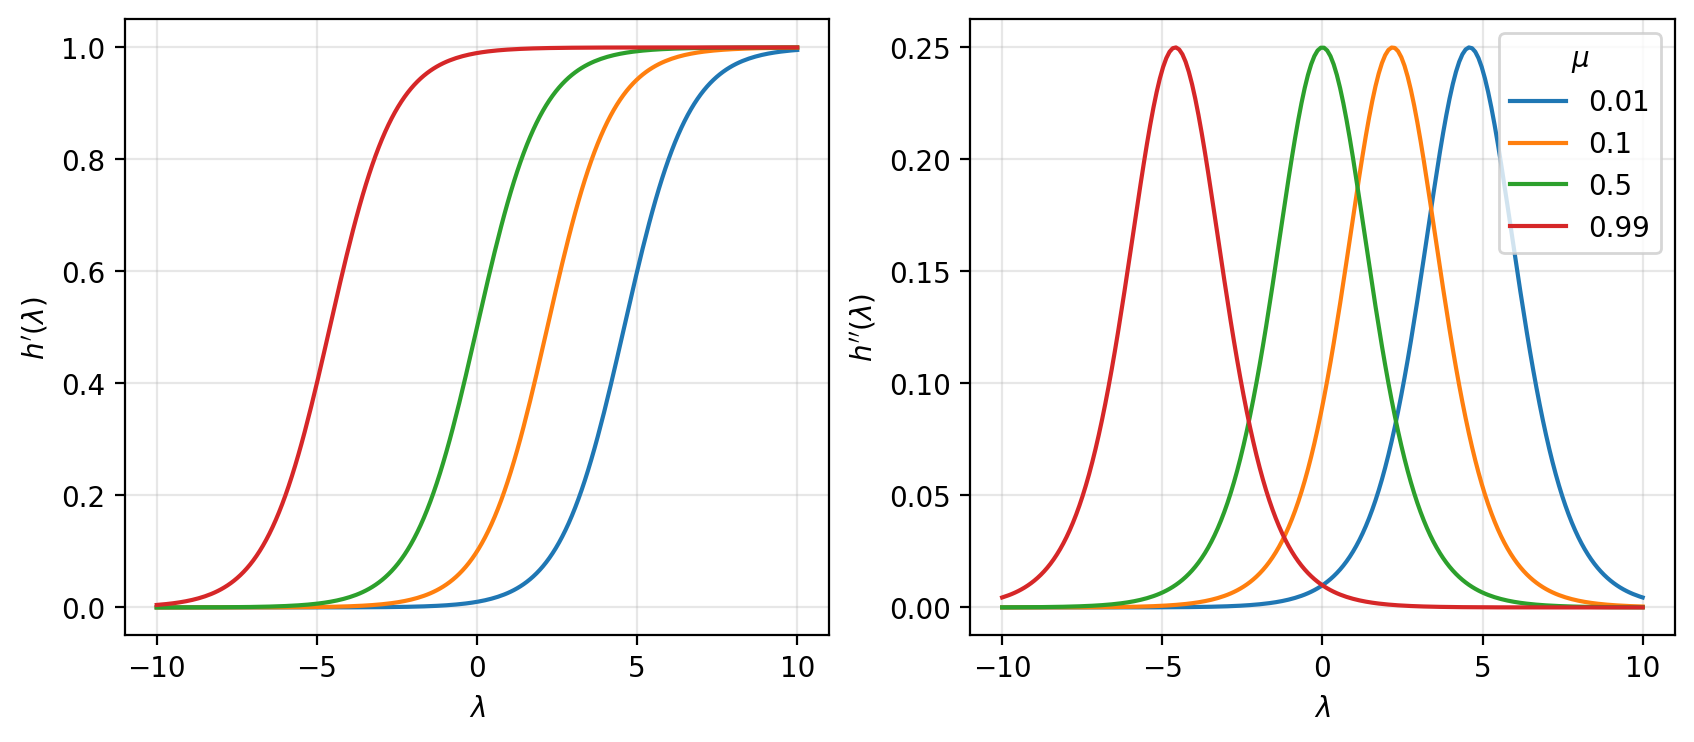

In [5]:
mu = 0.5

mu_vals = [0.01, 0.1, 0.5, 0.99]

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
for mu in mu_vals:
    lmbda_vals = np.linspace(-10, 10, 200)
    hprime_vals = hprime(mu, lmbda_vals)
    hpprime_vals = hprime_vals * (1 - hprime_vals)

    ax[0].plot(lmbda_vals, hprime_vals, label=mu)
    ax[0].set_xlabel("$\lambda$")
    ax[0].set_ylabel("$h'(\lambda)$")
    ax[0].grid(alpha=0.3)
    
    ax[1].plot(lmbda_vals, hpprime_vals, label=mu)
    ax[1].set_xlabel("$\lambda$")
    ax[1].set_ylabel("$h''(\lambda)$")
    ax[1].grid(alpha=0.3)
    ax[1].legend(title="$\mu$")

## Multiplicate Chernoff bounds

In [64]:
# Theoretical
mu = 0.3
N = 100

eps_vals = np.linspace(0, 1, 100)
ubound_vals = np.exp(-N * mu * eps_vals ** 2 / (2 + eps_vals))

In [65]:
# Empirical
np.random.seed(314)
n_trials = 100
X = np.random.choice(2, size=(n_trials, N), p=[1 - mu, mu])
Xhat = X.mean(axis=1)
Xhat

array([0.29, 0.32, 0.27, 0.26, 0.33, 0.3 , 0.35, 0.35, 0.29, 0.3 , 0.39,
       0.4 , 0.26, 0.29, 0.35, 0.35, 0.34, 0.33, 0.21, 0.32, 0.25, 0.4 ,
       0.27, 0.3 , 0.34, 0.33, 0.25, 0.34, 0.25, 0.34, 0.26, 0.22, 0.31,
       0.3 , 0.38, 0.41, 0.19, 0.29, 0.29, 0.33, 0.24, 0.32, 0.26, 0.37,
       0.29, 0.29, 0.37, 0.29, 0.3 , 0.33, 0.28, 0.28, 0.33, 0.26, 0.29,
       0.33, 0.36, 0.34, 0.29, 0.29, 0.26, 0.28, 0.24, 0.25, 0.36, 0.31,
       0.22, 0.28, 0.32, 0.31, 0.24, 0.34, 0.25, 0.27, 0.28, 0.35, 0.36,
       0.28, 0.34, 0.28, 0.23, 0.35, 0.43, 0.37, 0.32, 0.31, 0.27, 0.34,
       0.28, 0.34, 0.28, 0.3 , 0.26, 0.39, 0.28, 0.31, 0.4 , 0.31, 0.29,
       0.28])

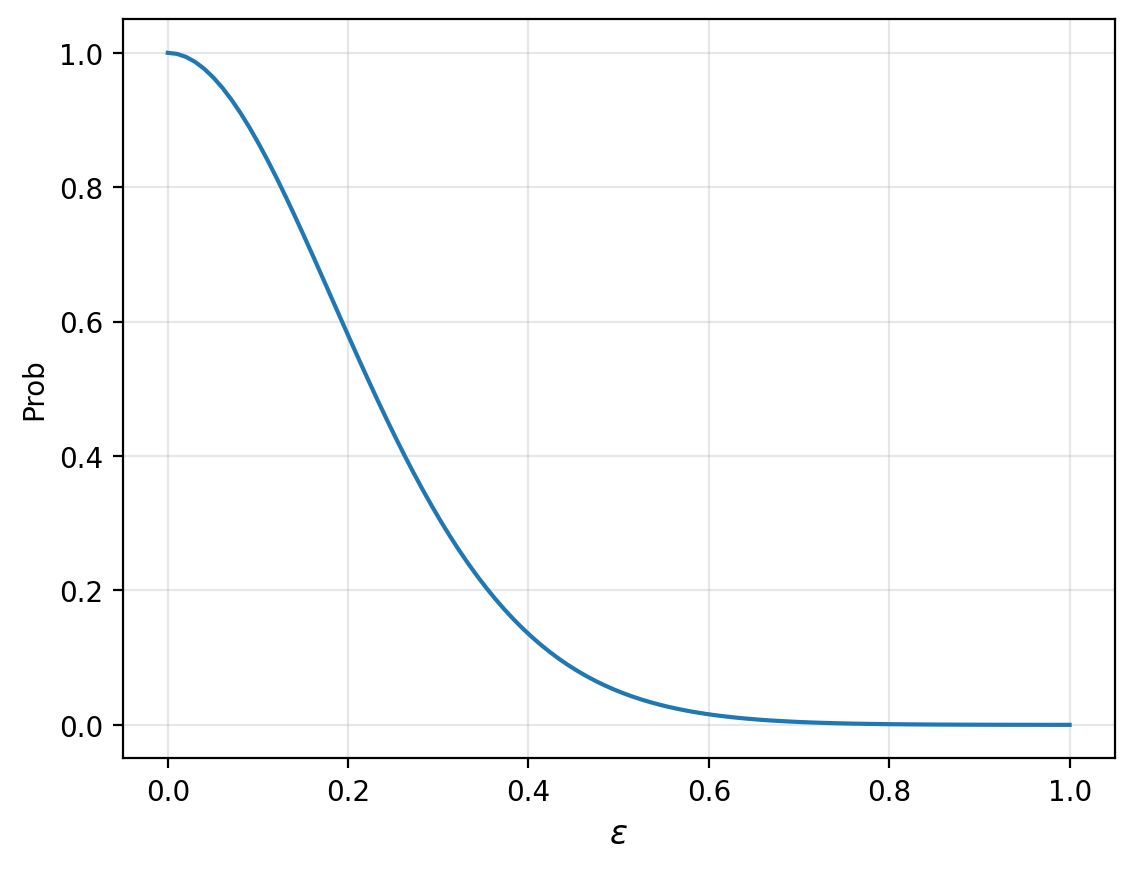

In [66]:
plt.plot(eps_vals, ubound_vals)
plt.xlabel(r"$\epsilon$", fontsize=12)
plt.ylabel("Prob")
plt.grid(alpha=0.3)